# Amazon (AMZN) Stock Price prediction using Facebook Prophet 

In [5]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [6]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [7]:
import pandas as pd
import plotly.express as px
#from fbprophet import Prophet
from prophet import Prophet
#
#import ipywidgets as widgets

In [8]:
 #Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [9]:
df = pd.read_csv('AMZN.csv')

In [10]:
#read_csv function from pandas

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800
1,2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000
2,2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000
3,2022-12-15,89.889999,89.970001,87.470001,88.449997,88.449997,84802900
4,2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146144100
...,...,...,...,...,...,...,...
247,2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000
248,2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800
249,2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000
250,2023-12-11,145.660004,146.190002,143.639999,145.889999,145.889999,50907300


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,117.831072,119.368730,116.353016,117.966469,117.966469,6.029315e+07
std,19.125679,19.142427,19.115752,19.131681,19.131681,2.135646e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.237840e+07
25%,99.725001,101.044998,98.094999,100.010000,100.010000,4.643740e+07
50%,124.774998,126.730003,123.689999,125.000000,125.000000,5.564410e+07
75%,133.597504,134.699997,131.982506,133.334996,133.334996,6.792652e+07
max,147.850006,149.259995,146.880005,147.729996,147.729996,1.581542e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [14]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [15]:
px.area(df, x='Date',y='Close')

In [16]:
px.line(df, x='Date',y='Close')

In [17]:
px.area(df, x='Date',y='Volume')

In [18]:
px.bar(df, y='Volume')

In [19]:
px.box(df, y='Close')

# Understanding Facebook Prophet

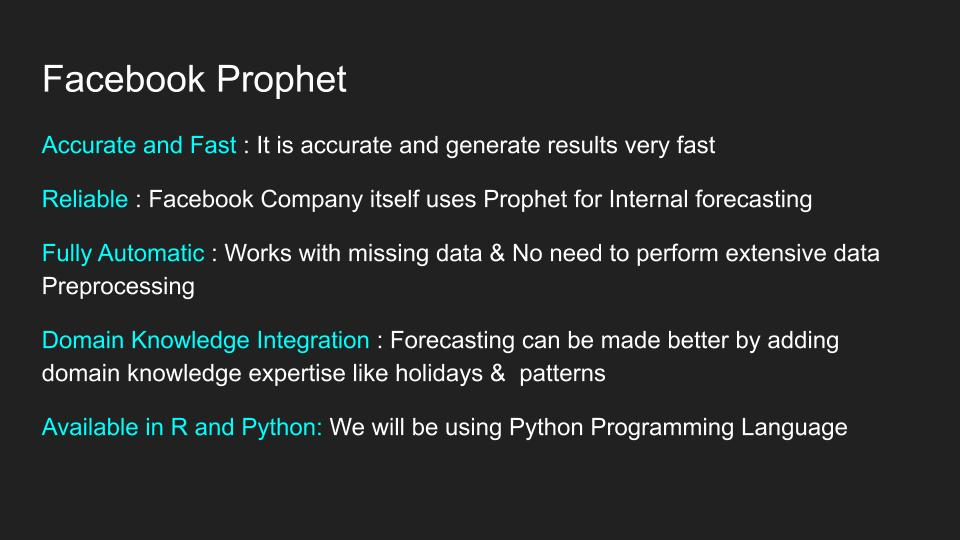

## Data Preperation

In [20]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-12,89.209999,90.580002,87.870003,90.550003,90.550003,61999800
1,2022-12-13,95.230003,96.250000,90.519997,92.489998,92.489998,100212000
2,2022-12-14,92.500000,93.459999,89.870003,91.580002,91.580002,70298000
3,2022-12-15,89.889999,89.970001,87.470001,88.449997,88.449997,84802900
4,2022-12-16,88.269997,89.349998,86.730003,87.860001,87.860001,146144100
...,...,...,...,...,...,...,...
247,2023-12-06,147.580002,147.850006,144.279999,144.520004,144.520004,39679000
248,2023-12-07,146.149994,147.919998,145.339996,146.880005,146.880005,52352800
249,2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000
250,2023-12-11,145.660004,146.190002,143.639999,145.889999,145.889999,50907300


In [21]:
  columns = ['Date','Close']

In [22]:
ndf = pd.DataFrame(df, columns = columns)

In [23]:
ndf

,Date,Close
0,2022-12-12,90.550003
1,2022-12-13,92.489998
2,2022-12-14,91.580002
3,2022-12-15,88.449997
4,2022-12-16,87.860001
...,...,...
247,2023-12-06,144.520004
248,2023-12-07,146.880005
249,2023-12-08,147.419998
250,2023-12-11,145.889999


In [24]:
prophet_df = ndf.rename(columns = {'Date':'ds', 'Close':'y'})

In [25]:
prophet_df

,ds,y
0,2022-12-12,90.550003
1,2022-12-13,92.489998
2,2022-12-14,91.580002
3,2022-12-15,88.449997
4,2022-12-16,87.860001
...,...,...
247,2023-12-06,144.520004
248,2023-12-07,146.880005
249,2023-12-08,147.419998
250,2023-12-11,145.889999


## Creating Facebook Prophet Model

In [26]:
m = Prophet()
m.fit(prophet_df)

13:16:39 - cmdstanpy - INFO - Chain [1] start processing
13:16:39 - cmdstanpy - INFO - Chain [1] done processing


##Forecasting

In [27]:
future = m.make_future_dataframe(periods=30) # 30: 30 days
future.tail()

,ds
277,2024-01-07
278,2024-01-08
279,2024-01-09
280,2024-01-10
281,2024-01-11


In [28]:
forecast = m.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-12-12,87.742902,81.417721,93.320663,87.742902,87.742902,-0.395304,-0.395304,-0.395304,-0.395304,-0.395304,-0.395304,0.0,0.0,0.0,87.347597
1,2022-12-13,87.895196,81.854832,93.608926,87.895196,87.895196,-0.523181,-0.523181,-0.523181,-0.523181,-0.523181,-0.523181,0.0,0.0,0.0,87.372015
2,2022-12-14,88.047490,81.015654,93.113000,88.047490,88.047490,-0.751175,-0.751175,-0.751175,-0.751175,-0.751175,-0.751175,0.0,0.0,0.0,87.296315
3,2022-12-15,88.199784,81.246262,93.246159,88.199784,88.199784,-0.691648,-0.691648,-0.691648,-0.691648,-0.691648,-0.691648,0.0,0.0,0.0,87.508136
4,2022-12-16,88.352079,82.240398,94.194928,88.352079,88.352079,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,-0.196727,0.0,0.0,0.0,88.155351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-01-07,150.871199,146.037610,157.929879,149.629312,151.773681,1.279018,1.279018,1.279018,1.279018,1.279018,1.279018,0.0,0.0,0.0,152.150217
278,2024-01-08,151.055727,144.534347,156.512203,149.736644,152.017310,-0.395304,-0.395304,-0.395304,-0.395304,-0.395304,-0.395304,0.0,0.0,0.0,150.660423
279,2024-01-09,151.240254,144.696633,156.710879,149.843441,152.279474,-0.523181,-0.523181,-0.523181,-0.523181,-0.523181,-0.523181,0.0,0.0,0.0,150.717073
280,2024-01-10,151.424782,144.147256,156.248994,149.936937,152.525948,-0.751175,-0.751175,-0.751175,-0.751175,-0.751175,-0.751175,0.0,0.0,0.0,150.673607


In [29]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
277,2024-01-07,152.150217,146.037610,157.929879
278,2024-01-08,150.660423,144.534347,156.512203
279,2024-01-09,150.717073,144.696633,156.710879
280,2024-01-10,150.673607,144.147256,156.248994
281,2024-01-11,150.917661,144.398669,157.271676


In [30]:
px.line(forecast, x='ds', y='yhat')

C:\Users\LanLam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\LanLam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



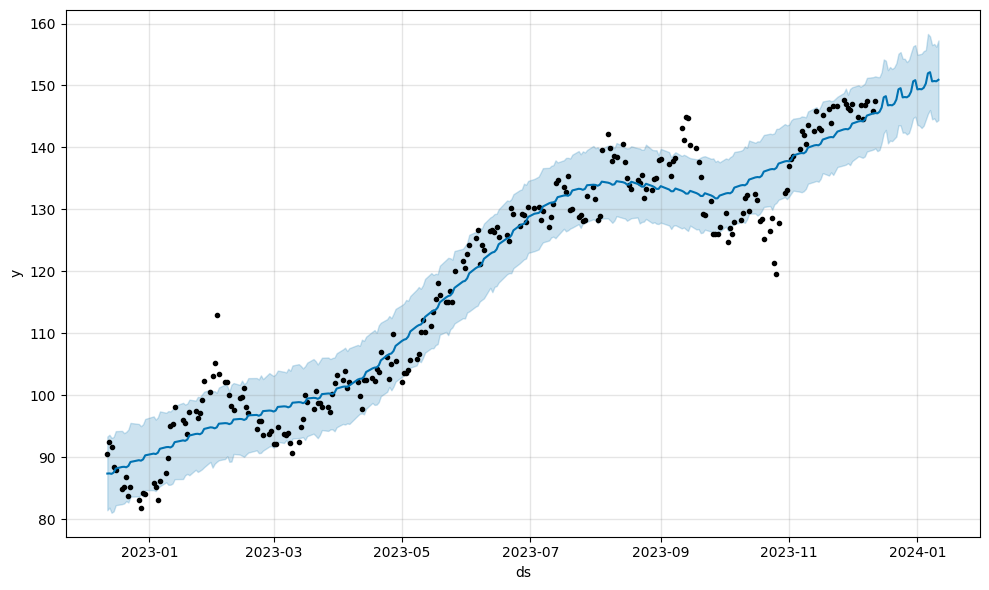

In [31]:
figure = m.plot(forecast, xlabel='ds',ylabel = 'y')

C:\Users\LanLam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



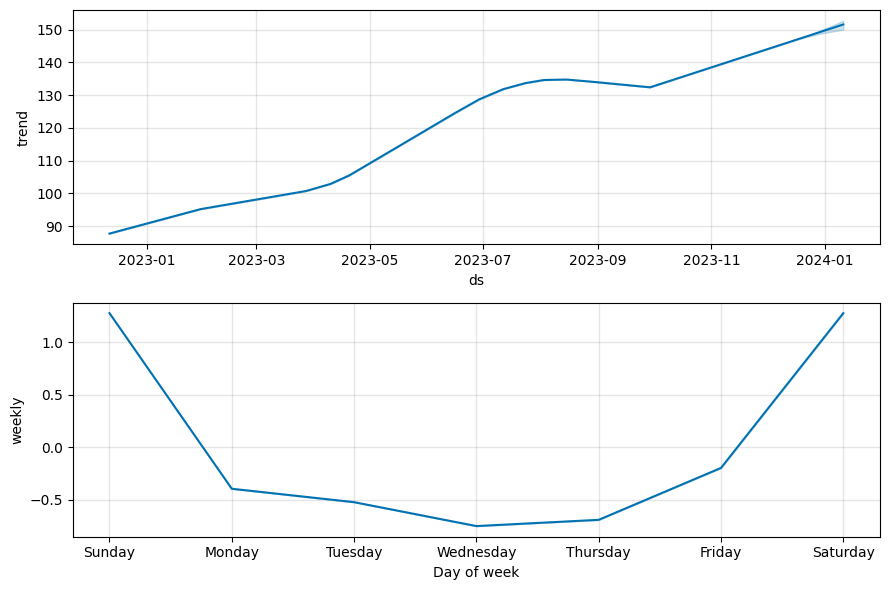

In [32]:
figure2 = m.plot_components(forecast)

In [34]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [35]:
plot_components_plotly(m, forecast)

##Downloading the Forecast data

In [39]:
#from google.colab import files
#forecast.to_csv('forecast.csv')
#files.download('forecast.csv')

In [40]:
#forecast.to_csv('forecast.csv', index=False)
forecast.to_csv('forecast.csv', index=True)